In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import pathlib
from pathlib import Path
from PIL import Image
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

# Set the directory paths for the dataset
data_dir = pathlib.Path('train_cancer/')
image_classes = os.listdir(data_dir)
print(image_classes)

['.DS_Store', 'malignant', 'benign', '.ipynb_checkpoints']


In [15]:
from tensorflow.keras.preprocessing import image

0


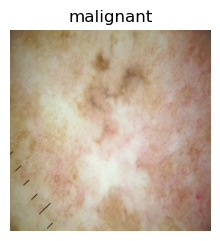

1


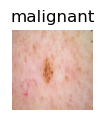

2


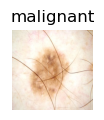

3


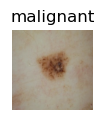

4


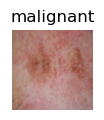

5


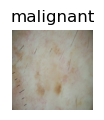

6


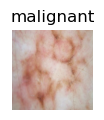

7


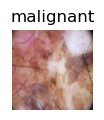

8


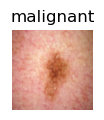

9


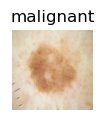

10


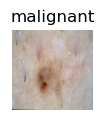

11


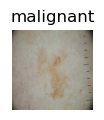

12


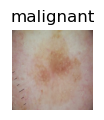

13


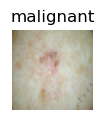

14


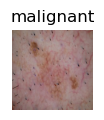

15


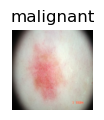

16


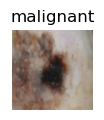

17


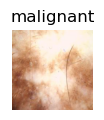

18


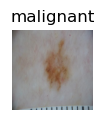

19


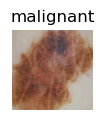

20


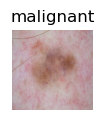

21


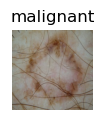

22


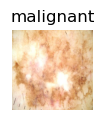

23


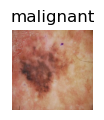

24


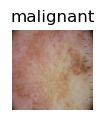

25


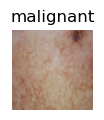

26


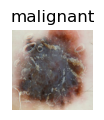

27


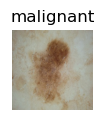

28


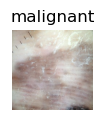

29


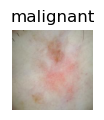

30


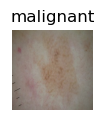

31


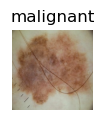

32


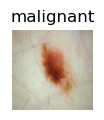

33


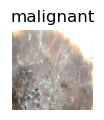

34


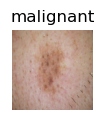

35


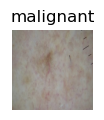

36


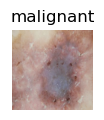

37


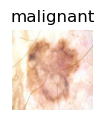

38


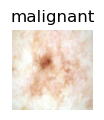

39


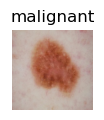

40


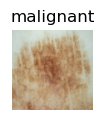

41


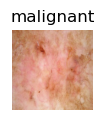

42


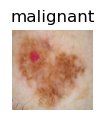

43


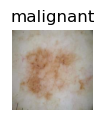

44


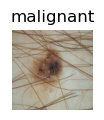

45


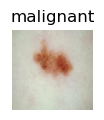

46


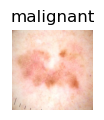

47


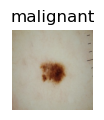

48


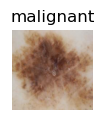

49


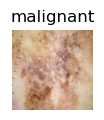

50


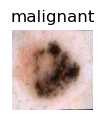

51


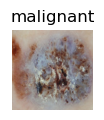

52


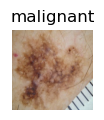

53


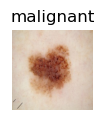

54


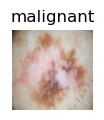

55


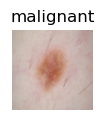

56


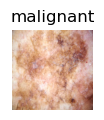

57


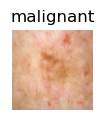

58


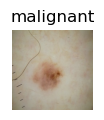

59


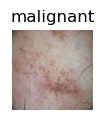

60


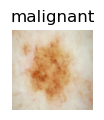

61


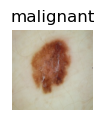

62


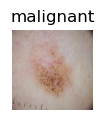

63


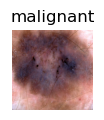

64


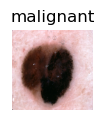

65


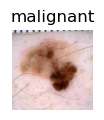

66


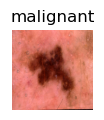

67


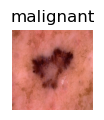

68


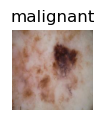

69


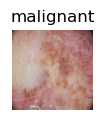

70


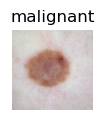

71


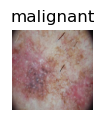

72


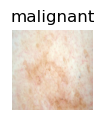

73


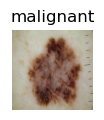

74


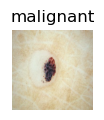

75


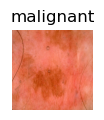

76


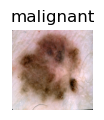

77


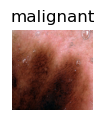

78


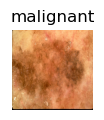

79


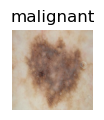

80


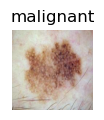

81


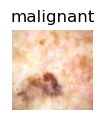

82


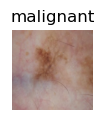

83


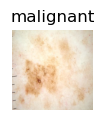

84


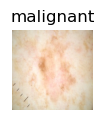

85


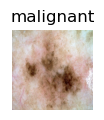

86


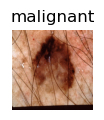

87


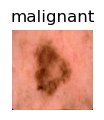

88


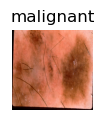

89


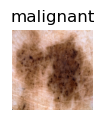

90


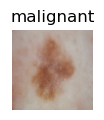

91


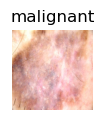

92


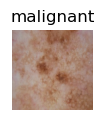

93


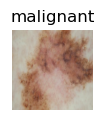

94


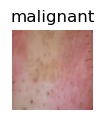

95


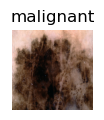

96


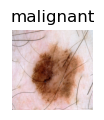

97


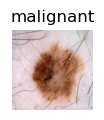

98


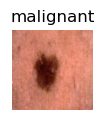

99


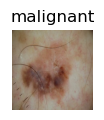

100


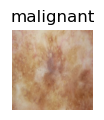

101


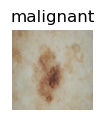

102


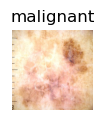

103


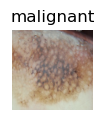

104


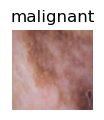

105


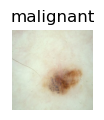

106


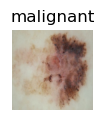

107


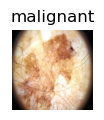

108


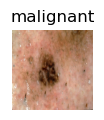

109


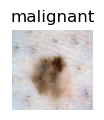

110


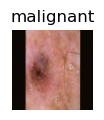

111


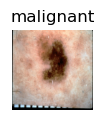

112


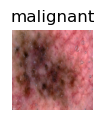

113


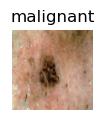

114


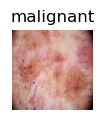

115


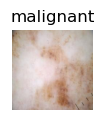

116


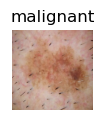

117


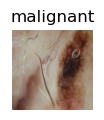

118


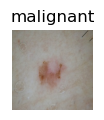

119


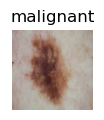

120


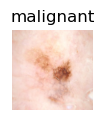

121


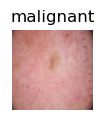

122


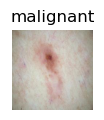

123


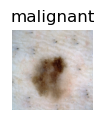

124


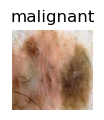

125


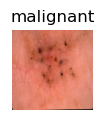

126


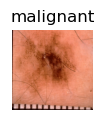

127


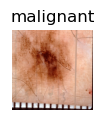

128


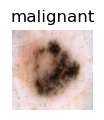

129


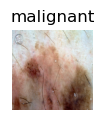

130


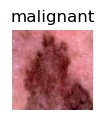

131


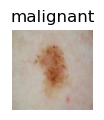

132


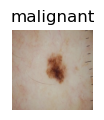

133


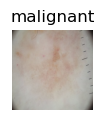

134


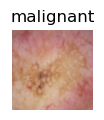

135


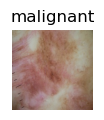

136


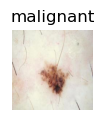

137


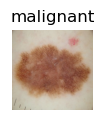

138


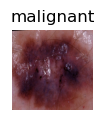

139


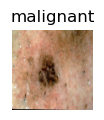

140


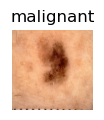

141


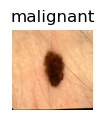

142


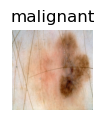

143


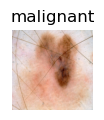

144


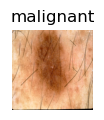

145


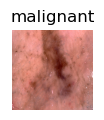

146


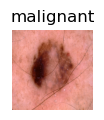

147


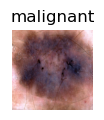

148


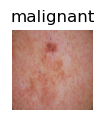

149


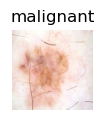

150


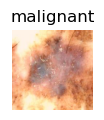

151


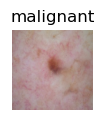

152


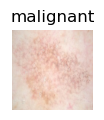

153


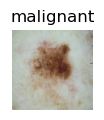

154


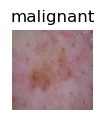

155


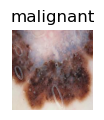

156


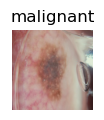

157


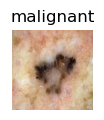

158


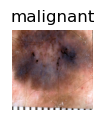

159


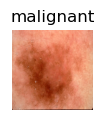

160


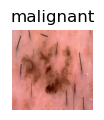

161


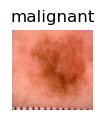

162


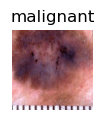

163


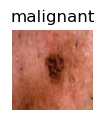

164


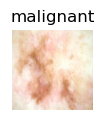

165


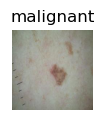

166


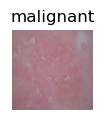

167


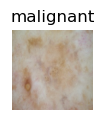

168


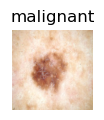

169


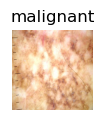

170


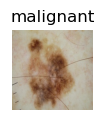

171


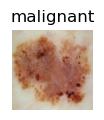

172


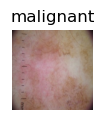

173


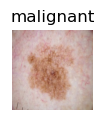

174


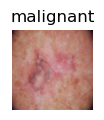

175


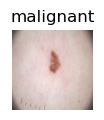

176


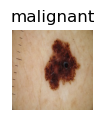

177


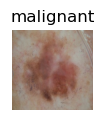

178


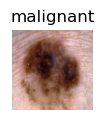

179


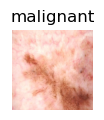

180


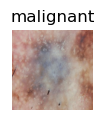

181


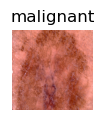

182


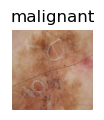

183


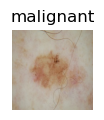

184


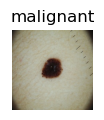

185


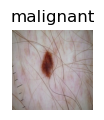

186


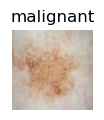

187


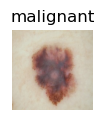

188


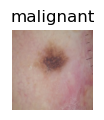

189


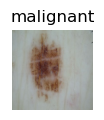

190


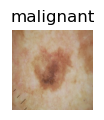

191


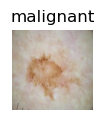

192


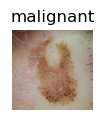

193


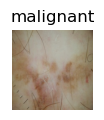

194


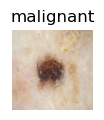

195


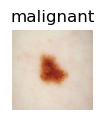

196


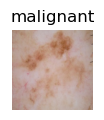

197


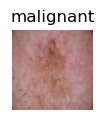

198


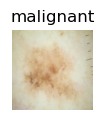

199


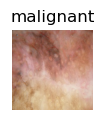

200


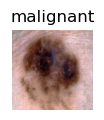

201


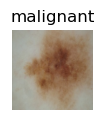

202


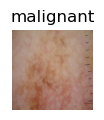

203


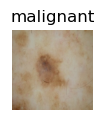

204


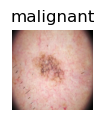

205


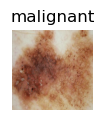

206


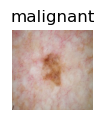

207


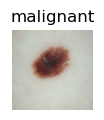

208


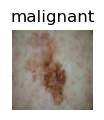

209


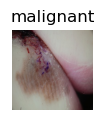

210


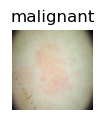

211


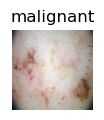

212


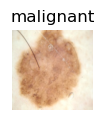

213


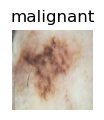

214


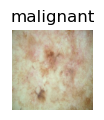

215


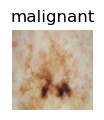

216


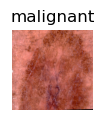

217


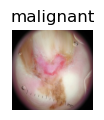

218


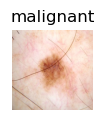

219


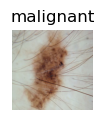

220


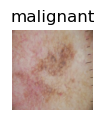

221


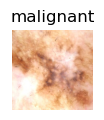

222


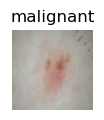

223


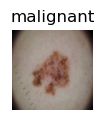

224


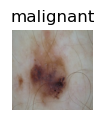

225


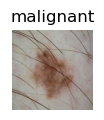

226


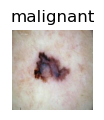

227


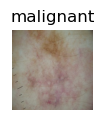

228


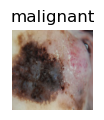

229


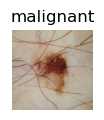

230


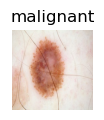

231


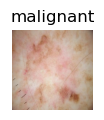

232


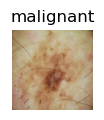

233


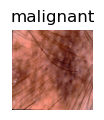

234


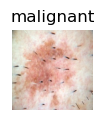

235


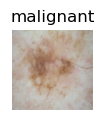

236


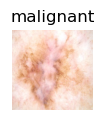

237


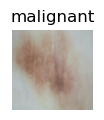

238


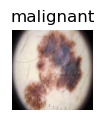

239


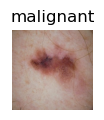

0


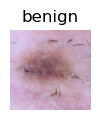

1


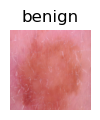

2


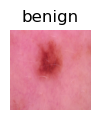

3


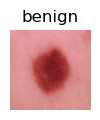

4


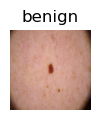

5


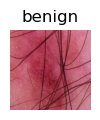

6


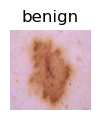

7


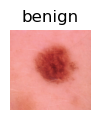

8


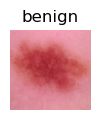

9


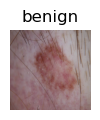

10


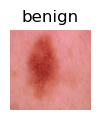

11


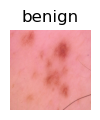

12


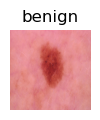

13


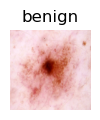

14


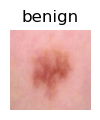

15


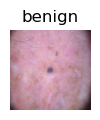

16


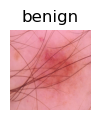

17


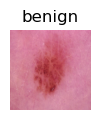

18


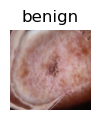

19


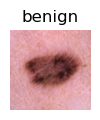

20


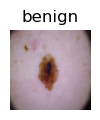

21


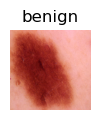

22


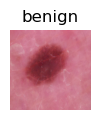

23


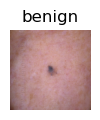

24


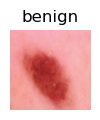

25


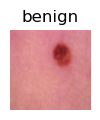

26


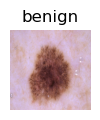

27


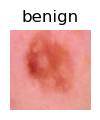

28


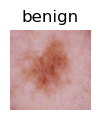

29


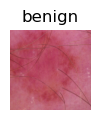

In [30]:
images = ['malignant', 'benign']
def plot_images(images):
    plt.figure(figsize=(12, 12))
    for i, category in enumerate(images):
        image_path = data_dir / category
        image_in_folder = os.listdir(image_path)
        for j in range(len(image_in_folder)):
            print(j)
            first_image = image_in_folder[j]
            first_image_path = image_path / first_image
            img = image.load_img(first_image_path)
            img_array = image.img_to_array(img) / 255.0
            plt.subplot(4, 4, i + 1)
            plt.imshow(img_array)
            plt.title(category)
            plt.axis('off')
            plt.show()

plot_images(images)


In [31]:
img_size = (224, 224)
batch_size = 32

In [32]:
# Data Augmentation and Preprocessing
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [36]:
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes = images
)

Found 216 images belonging to 2 classes.


In [37]:
val_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes = images
)

Found 54 images belonging to 2 classes.


In [38]:
# Build the CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 462ms/step - accuracy: 0.8892 - loss: 5.5416 - val_accuracy: 0.9074 - val_loss: 0.2818
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.8566 - loss: 0.3897 - val_accuracy: 0.8889 - val_loss: 0.2694
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - accuracy: 0.8889 - loss: 0.2914 - val_accuracy: 0.8889 - val_loss: 0.2646
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.8882 - loss: 0.2765 - val_accuracy: 0.8889 - val_loss: 0.2616
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.8817 - loss: 0.2670 - val_accuracy: 0.9074 - val_loss: 0.2090
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 447ms/step - accuracy: 0.9334 - loss: 0.1941 - val_accuracy: 0.9444 - val_loss: 0.2474
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.9511 - loss: 0.1482 - val_accuracy: 0.9074 - val_loss: 0.1782
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accuracy: 0.9054 - loss: 0.1870 - val_accuracy: 0.9444 - val_loss:

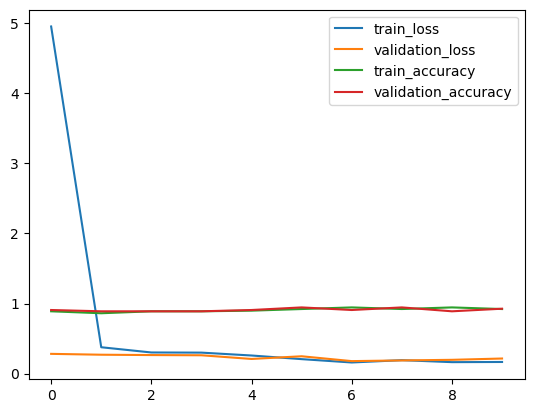

In [39]:
# Plot the training results
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


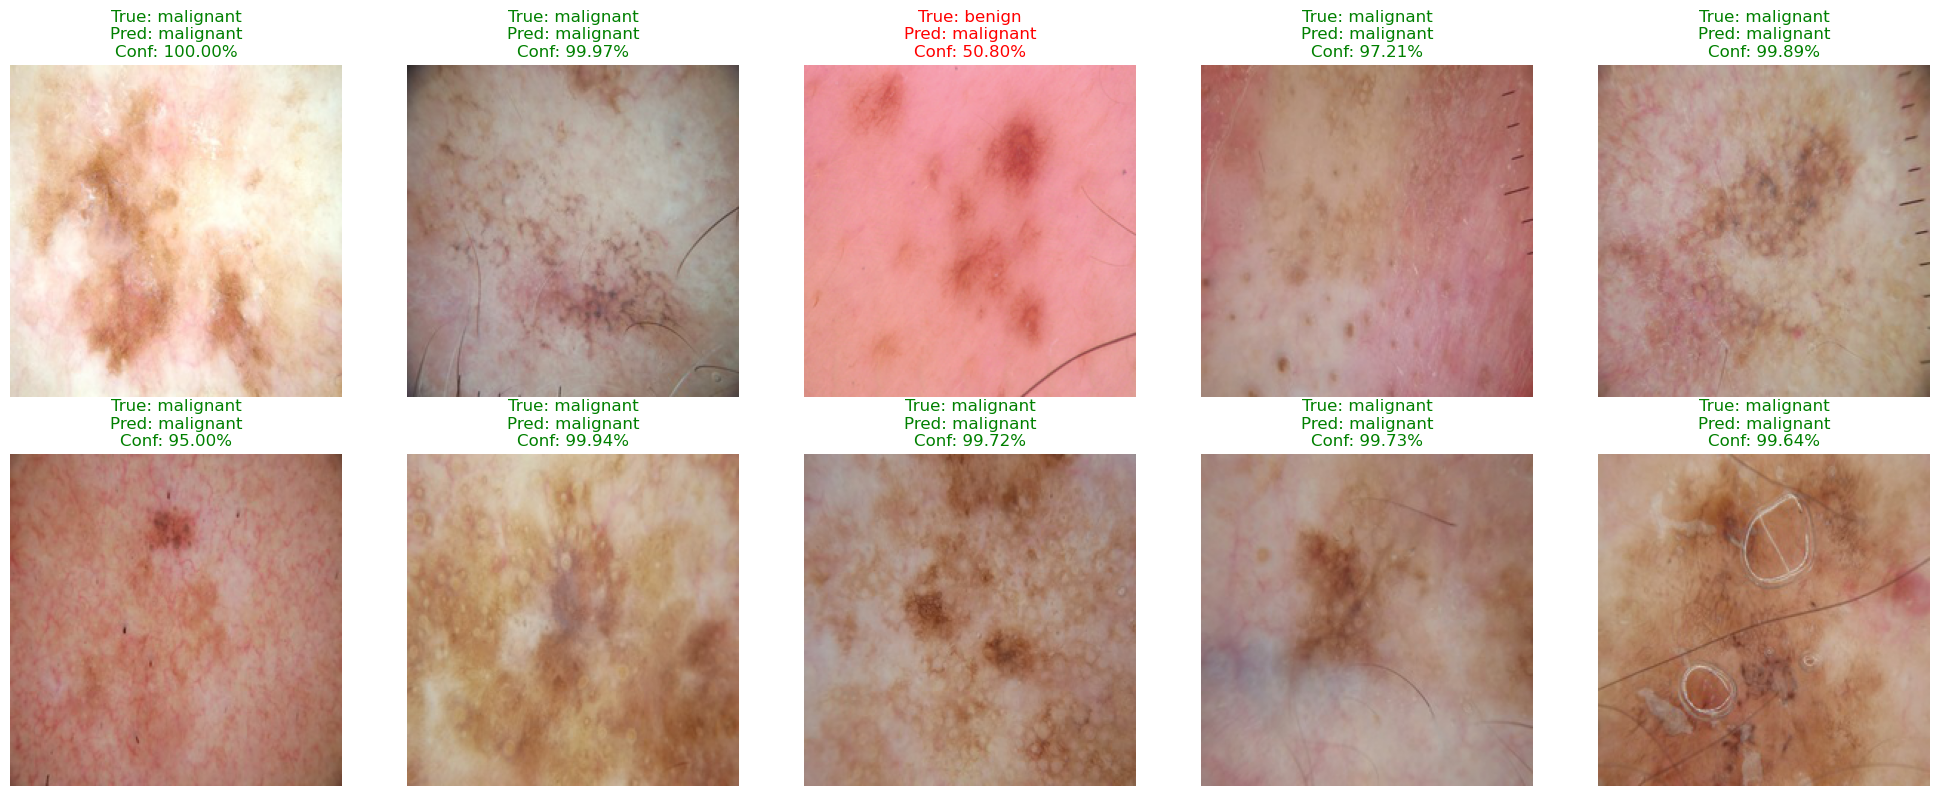

In [40]:
def plot_predictions_with_confidence(model, validation_generator, num_images=10):
    class_indices = validation_generator.class_indices
    class_names = list(class_indices.keys())
    
    validation_generator.reset()
    X_val, y_val = next(validation_generator)
    for i in range(1, validation_generator.samples // validation_generator.batch_size):
        img, label = next(validation_generator)
        X_val = np.append(X_val, img, axis=0)
        y_val = np.append(y_val, label, axis=0)
    
    indices = random.sample(range(len(X_val)), num_images)
    selected_images = X_val[indices]
    selected_labels = y_val[indices]
    
    predictions = model.predict(selected_images)
    predicted_classes = np.argmax(predictions, axis=1)
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for i, idx in enumerate(indices):
        axes[i].imshow(selected_images[i])
        axes[i].axis('off')
        true_label = class_names[np.argmax(selected_labels[i])]
        pred_label = class_names[predicted_classes[i]]
        confidence = predictions[i][predicted_classes[i]] * 100
        color = 'green' if true_label == pred_label else 'red'
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}%', color=color, fontsize=12)
    
    plt.tight_layout()
    plt.show()

plot_predictions_with_confidence(model, val_generator, num_images=10)